In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cash = pd.read_csv("/Users/anastasiatkaceva/Desktop/IronHack2024/LABs/lab_9/project_dataset/cash_request.csv")

In [3]:
cash.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [4]:
cash['created_at'] = pd.to_datetime(cash['created_at'])
cash['updated_at'] = pd.to_datetime(cash['updated_at'])
cash['moderated_at'] = pd.to_datetime(cash['moderated_at'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')
cash['reimbursement_date']=pd.to_datetime(cash['reimbursement_date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')
cash['reco_last_update']=pd.to_datetime(cash['reco_last_update'])
cash['reco_creation'] = pd.to_datetime(cash['reco_creation'])
cash['cash_request_received_date'] = pd.to_datetime(cash['cash_request_received_date'])
cash['money_back_date'] = pd.to_datetime(cash['money_back_date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')
cash['send_at'] = pd.to_datetime(cash['send_at'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')


In [5]:
cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  datetime64[ns, UTC]
 5   user_id                     21867 non-null  float64            
 6   moderated_at                123 non-null    datetime64[ns, UTC]
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          20920 non-null  datetime64[ns, UTC]
 9   cash_request_received_date  16289 non-null  datetime64[ns]     
 10  money_back_date             4503 non-null   datetime64[ns,

In [6]:
cash.duplicated().sum()

0

In [7]:
numero_nulos = cash['user_id'].isna().sum()
numero_nulos

2103

In [63]:
rejected_0 = cash[cash['status'] =="rejected"]
rejected_0.sample(10)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,m_created_at,m_reimbursement,transaction_month,cohort_month,cohort_index
7521,17879,100.0,rejected,2020-09-25 18:38:04.889319+00:00,2020-09-26 07:27:24.800460+00:00,46267.0,NaT,NaN,NaT,NaT,...,regular,NaT,NaN,NaT,NaT,9,NaN,2020-09,2020-09,0
4470,10333,50.0,rejected,2020-07-31 17:52:37.669913+00:00,2020-08-01 13:10:00.880762+00:00,28559.0,NaT,NaN,2020-08-10 22:00:00+00:00,NaT,...,instant,NaT,NaN,NaT,NaT,7,8.0,2020-07,2020-07,0
2012,5863,100.0,rejected,2020-06-30 07:20:04.637486+00:00,2020-06-30 13:00:34.080290+00:00,16109.0,NaT,NaN,2020-08-05 22:00:00+00:00,NaT,...,regular,NaT,NaN,NaT,NaT,6,8.0,2020-06,2020-06,0
3532,12940,50.0,rejected,2020-08-18 13:16:15.141836+00:00,2020-08-18 13:33:33.669470+00:00,27199.0,NaT,NaN,2020-09-07 22:00:00+00:00,NaT,...,instant,NaT,NaN,NaT,NaT,8,9.0,2020-08,2020-07,1
4592,14623,100.0,rejected,2020-09-05 06:40:16.221422+00:00,2020-09-05 06:43:43.029042+00:00,33099.0,NaT,NaN,2020-10-02 22:00:00+00:00,NaT,...,regular,NaT,NaN,NaT,NaT,9,10.0,2020-09,2020-07,2
5089,14832,50.0,rejected,2020-09-06 15:08:06.935371+00:00,2020-09-06 16:42:35.022503+00:00,38035.0,NaT,NaN,2020-10-01 22:00:00+00:00,NaT,...,regular,NaT,NaN,NaT,NaT,9,10.0,2020-09,2020-09,0
2972,7210,100.0,rejected,2020-07-08 17:41:05.889854+00:00,2020-07-08 17:53:52.698908+00:00,10327.0,NaT,NaN,2020-07-31 22:00:00+00:00,NaT,...,regular,NaT,NaN,NaT,NaT,7,7.0,2020-07,2020-07,0
4879,16180,100.0,rejected,2020-09-15 07:14:48.430078+00:00,2020-09-15 09:02:42.985637+00:00,40657.0,NaT,NaN,2020-10-02 22:00:00+00:00,NaT,...,instant,NaT,NaN,NaT,NaT,9,10.0,2020-09,2020-09,0
7688,18325,50.0,rejected,2020-09-29 07:45:18.606931+00:00,2020-09-29 09:02:12.613488+00:00,52845.0,NaT,NaN,2020-10-08 22:00:00+00:00,NaT,...,instant,NaT,NaN,NaT,NaT,9,10.0,2020-09,2020-09,0
1884,4787,90.0,rejected,2020-06-23 10:32:24.922264+00:00,2020-06-23 13:41:48.665238+00:00,1159.0,NaT,NaN,2020-07-20 22:00:00+00:00,NaT,...,regular,NaT,NaN,NaT,NaT,6,7.0,2020-06,2019-12,6


In [64]:
rejected_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6568 entries, 0 to 10532
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          6568 non-null   int64              
 1   amount                      6568 non-null   float64            
 2   status                      6568 non-null   object             
 3   created_at                  6568 non-null   datetime64[ns, UTC]
 4   updated_at                  6568 non-null   datetime64[ns, UTC]
 5   user_id                     5221 non-null   float64            
 6   moderated_at                4 non-null      datetime64[ns, UTC]
 7   deleted_account_id          1347 non-null   float64            
 8   reimbursement_date          5261 non-null   datetime64[ns, UTC]
 9   cash_request_received_date  1 non-null      datetime64[ns]     
 10  money_back_date             0 non-null      datetime64[ns, UTC]


In [46]:
for column in rejected_0.columns:
    print("Value counts for column", column, ":")
    print(rejected_0[column].value_counts())
    print()

Value counts for column id :
id
5        1
13115    1
13166    1
13161    1
13160    1
        ..
7775     1
7586     1
7698     1
7151     1
2217     1
Name: count, Length: 6568, dtype: int64

Value counts for column amount :
amount
100.0    4253
50.0     1863
80.0      113
70.0       62
60.0       60
90.0       45
40.0       38
30.0       30
20.0       25
75.0       11
1.0         8
99.0        8
200.0       7
95.0        6
55.0        6
85.0        6
65.0        5
10.0        5
25.0        4
45.0        4
98.0        2
72.0        1
22.0        1
67.0        1
94.0        1
35.0        1
97.0        1
28.0        1
Name: count, dtype: int64

Value counts for column status :
status
rejected    6568
Name: count, dtype: int64

Value counts for column created_at :
created_at
2019-12-10 19:05:21.596873+00:00    1
2020-08-19 16:23:02.752968+00:00    1
2020-08-19 16:30:50.142585+00:00    1
2020-08-19 16:29:01.329476+00:00    1
2020-08-19 16:29:01.136879+00:00    1
                         

In [65]:
rejected_0['m_created_at'] = rejected_0['created_at'].dt.month
rejected_0['m_reimbursement'] = rejected_0['reimbursement_date'].dt.month
rejected_0.sample(5)

/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_61670/4222360703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rejected_0['m_created_at'] = rejected_0['created_at'].dt.month
/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_61670/4222360703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rejected_0['m_reimbursement'] = rejected_0['reimbursement_date'].dt.month


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,m_created_at,m_reimbursement,transaction_month,cohort_month,cohort_index
5088,12417,45.0,rejected,2020-08-14 01:41:06.553026+00:00,2020-08-14 08:05:34.950781+00:00,9650.0,NaT,NaN,2020-09-03 22:00:00+00:00,NaT,...,instant,NaT,NaN,NaT,NaT,8,9.0,2020-08,2020-08,0
6180,15213,50.0,rejected,2020-09-08 21:12:18.602015+00:00,2020-09-09 07:33:52.896359+00:00,NaN,NaT,5237.0,2020-10-06 22:00:00+00:00,NaT,...,instant,NaT,NaN,NaT,NaT,9,10.0,2020-09,NaT,24262
1815,3007,100.0,rejected,2020-06-11 11:22:12.679208+00:00,2020-06-11 13:21:34.935256+00:00,8058.0,NaT,NaN,2020-07-09 22:00:00+00:00,NaT,...,regular,NaT,NaN,NaT,NaT,6,7.0,2020-06,2020-04,2
9369,11293,50.0,rejected,2020-08-07 08:37:24.101463+00:00,2020-08-07 09:05:08.905834+00:00,NaN,NaT,19304.0,2020-09-05 22:00:00+00:00,NaT,...,instant,NaT,NaN,NaT,NaT,8,9.0,2020-08,NaT,24261
3959,8827,50.0,rejected,2020-07-18 10:25:43.449436+00:00,2020-07-20 19:49:51.121287+00:00,25075.0,NaT,NaN,2020-08-05 22:00:00+00:00,NaT,...,regular,NaT,NaN,NaT,NaT,7,8.0,2020-07,2020-07,0


In [66]:

from datetime import datetime
#Following tutorial from youtube I will first create a subset only with the relevan data 
rejected = rejected_0[['user_id', 'created_at', 'amount', 'transfer_type']].copy(deep=True)
rejected.head()

,user_id,created_at,amount,transfer_type
0,804.0,2019-12-10 19:05:21.596873+00:00,100.0,regular
1,231.0,2019-12-10 19:50:12.347780+00:00,100.0,regular
2,191.0,2019-12-10 19:13:35.825460+00:00,100.0,regular
3,761.0,2019-12-10 19:16:10.880172+00:00,99.0,regular
4,7686.0,2020-05-06 09:59:38.877376+00:00,100.0,regular


In [67]:
rejected['YM'] = rejected['created_at'].dt.to_period('M')
rejected

/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_61670/1502746743.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  rejected['YM'] = rejected['created_at'].dt.to_period('M')


,user_id,created_at,amount,transfer_type,YM
0,804.0,2019-12-10 19:05:21.596873+00:00,100.0,regular,2019-12
1,231.0,2019-12-10 19:50:12.347780+00:00,100.0,regular,2019-12
2,191.0,2019-12-10 19:13:35.825460+00:00,100.0,regular,2019-12
3,761.0,2019-12-10 19:16:10.880172+00:00,99.0,regular,2019-12
4,7686.0,2020-05-06 09:59:38.877376+00:00,100.0,regular,2020-05
...,...,...,...,...,...
10525,NaN,2020-07-16 03:07:19.946365+00:00,100.0,regular,2020-07
10526,NaN,2020-07-24 18:13:01.188076+00:00,50.0,regular,2020-07
10527,NaN,2020-08-17 21:15:49.720329+00:00,50.0,instant,2020-08
10528,NaN,2020-09-08 14:41:29.933930+00:00,80.0,instant,2020-09


In [68]:
start_month = rejected['YM'].min()
start_month

Period('2019-12', 'M')

In [71]:
rejected['index_month_cash_request'] = rejected['YM'].apply(lambda x: (x - start_month).n)
rejected

,user_id,created_at,amount,transfer_type,YM,index_month_cash_request
0,804.0,2019-12-10 19:05:21.596873+00:00,100.0,regular,2019-12,0
1,231.0,2019-12-10 19:50:12.347780+00:00,100.0,regular,2019-12,0
2,191.0,2019-12-10 19:13:35.825460+00:00,100.0,regular,2019-12,0
3,761.0,2019-12-10 19:16:10.880172+00:00,99.0,regular,2019-12,0
4,7686.0,2020-05-06 09:59:38.877376+00:00,100.0,regular,2020-05,5
...,...,...,...,...,...,...
10525,NaN,2020-07-16 03:07:19.946365+00:00,100.0,regular,2020-07,7
10526,NaN,2020-07-24 18:13:01.188076+00:00,50.0,regular,2020-07,7
10527,NaN,2020-08-17 21:15:49.720329+00:00,50.0,instant,2020-08,8
10528,NaN,2020-09-08 14:41:29.933930+00:00,80.0,instant,2020-09,9


In [72]:
rejected2 = rejected.groupby('user_id')['index_month_cash_request'].min().reset_index()
rejected2= rejected2.rename(columns={'index_month_cash_request':'cohort_month'})
rejected2.sample(10)

,user_id,cohort_month
365,6179.0,4
1125,19955.0,7
1844,34344.0,7
2064,38035.0,9
2548,58534.0,10
1745,32822.0,7
1670,31314.0,9
1886,34674.0,8
138,1754.0,3
1223,21762.0,8


In [73]:
rejected3= rejected.join(rejected2.set_index('user_id'), on = 'user_id')
rejected3.sample(5)

,user_id,created_at,amount,transfer_type,YM,index_month_cash_request,cohort_month
5694,10113.0,2020-09-04 14:19:48.891153+00:00,100.0,instant,2020-09,9,6.0
1769,18148.0,2020-07-17 10:27:10.283909+00:00,100.0,regular,2020-07,7,7.0
1505,21831.0,2020-06-25 15:41:46.074656+00:00,100.0,regular,2020-06,6,6.0
5155,35275.0,2020-08-14 15:55:17.906339+00:00,50.0,regular,2020-08,8,8.0
2317,17191.0,2020-06-25 17:39:09.828513+00:00,100.0,regular,2020-06,6,6.0


In [74]:
rejected3['cohort_index'] = rejected3.index_month_cash_request - rejected3.cohort_month
rejected3.head()

,user_id,created_at,amount,transfer_type,YM,index_month_cash_request,cohort_month,cohort_index
0,804.0,2019-12-10 19:05:21.596873+00:00,100.0,regular,2019-12,0,0.0,0.0
1,231.0,2019-12-10 19:50:12.347780+00:00,100.0,regular,2019-12,0,0.0,0.0
2,191.0,2019-12-10 19:13:35.825460+00:00,100.0,regular,2019-12,0,0.0,0.0
3,761.0,2019-12-10 19:16:10.880172+00:00,99.0,regular,2019-12,0,0.0,0.0
4,7686.0,2020-05-06 09:59:38.877376+00:00,100.0,regular,2020-05,5,5.0,0.0


In [78]:
#Since we can have various CR requested by the same user in a month, we leave just 1st one
rejected4 = rejected3[['user_id', 'cohort_month', 'cohort_index', 'YM']]
rejected5= rejected4.drop_duplicates(subset=['user_id', 'cohort_month', 'cohort_index', 'YM'], keep='first')

In [79]:
rejected6 = rejected5.groupby(['cohort_month', 'cohort_index', 'YM'])['user_id'].count().reset_index()
rejected6 = rejected6.rename(columns={'user_id':"costumer_count"})
rejected6

,cohort_month,cohort_index,YM,costumer_count
0,0.0,0.0,2019-12,69
1,0.0,1.0,2020-01,12
2,0.0,2.0,2020-02,3
3,0.0,3.0,2020-03,4
4,0.0,4.0,2020-04,4
...,...,...,...,...
57,8.0,3.0,2020-11,1
58,9.0,0.0,2020-09,634
59,9.0,1.0,2020-10,39
60,10.0,0.0,2020-10,199


In [84]:

rejected7 = rejected6.pivot_table(index='cohort_month', columns='cohort_index', values='costumer_count')
rejected7
#so in month 0 only 1 joined and the same person returned to the platform in 1st month,5th,6th,9-11
#in month 1 204 people ask for CR, out of them 69 asked again in 1st month, 44 in a second...

cohort_index,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
cohort_month,,,,,,,,,,,
0.0,69.0,12.0,3.0,4.0,4.0,1.0,2.0,2.0,4.0,3.0,2.0
1.0,55.0,12.0,3.0,4.0,1.0,3.0,NaN,NaN,NaN,1.0,NaN
2.0,29.0,10.0,3.0,1.0,2.0,NaN,2.0,NaN,1.0,NaN,NaN
3.0,27.0,9.0,6.0,4.0,1.0,3.0,4.0,NaN,NaN,NaN,NaN
4.0,71.0,27.0,15.0,6.0,7.0,8.0,3.0,NaN,NaN,NaN,NaN
5.0,81.0,31.0,14.0,10.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
6.0,436.0,133.0,72.0,36.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN
7.0,607.0,183.0,66.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.0,400.0,94.0,25.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:

rejected8 = rejected7.divide(rejected7.iloc[:,0], axis=0).round(3)*100
rejected8

cohort_index,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
cohort_month,,,,,,,,,,,
0.0,100.0,17.4,4.3,5.8,5.8,1.4,2.9,2.9,5.8,4.3,2.9
1.0,100.0,21.8,5.5,7.3,1.8,5.5,NaN,NaN,NaN,1.8,NaN
2.0,100.0,34.5,10.3,3.4,6.9,NaN,6.9,NaN,3.4,NaN,NaN
3.0,100.0,33.3,22.2,14.8,3.7,11.1,14.8,NaN,NaN,NaN,NaN
4.0,100.0,38.0,21.1,8.5,9.9,11.3,4.2,NaN,NaN,NaN,NaN
5.0,100.0,38.3,17.3,12.3,2.5,2.5,NaN,NaN,NaN,NaN,NaN
6.0,100.0,30.5,16.5,8.3,3.9,NaN,NaN,NaN,NaN,NaN,NaN
7.0,100.0,30.1,10.9,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.0,100.0,23.5,6.2,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


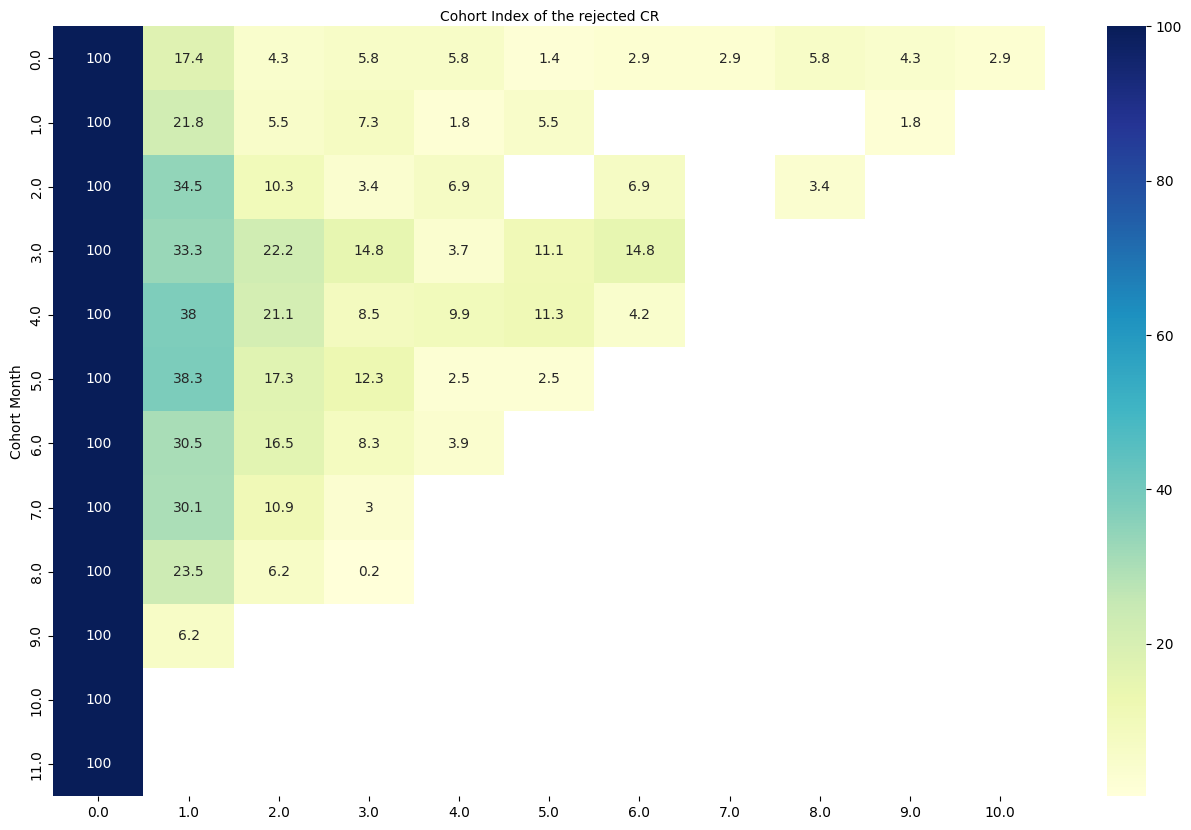

In [87]:

fig, ax = plt.subplots(1,1, figsize=(16,10))
sns.heatmap(rejected8, annot = True, cmap="YlGnBu", fmt = 'g')
ax.set_ylabel('Cohort Month')
ax.set_xlabel('Cohort Index of the rejected CR')
ax.xaxis.set_label_position('top')
plt.show()

BY WEEK

In [37]:
start_week = cash2['signup_week'].min()

In [38]:
cash2['index_week_cash_request'] = cash2['signup_week'].apply(lambda x: (x - start_week).n)

In [39]:
cash3_2 = cash2.groupby('user_id')['index_week_cash_request'].min().reset_index()
cash3_2= cash3_2.rename(columns={'index_week_cash_request':'cohort_week'})

In [40]:

cash4_2= cash2.join(cash3_2.set_index('user_id'), on = 'user_id')
cash4_2

,user_id,created_at,YM,index_month_cash_request,signup_week,index_week_cash_request,cohort_week
0,804.0,2019-12-10 19:05:21.596873+00:00,2019-12,1,2019-12-09/2019-12-15,3,3.0
1,231.0,2019-12-10 19:50:12.347780+00:00,2019-12,1,2019-12-09/2019-12-15,3,3.0
2,191.0,2019-12-10 19:13:35.825460+00:00,2019-12,1,2019-12-09/2019-12-15,3,3.0
3,761.0,2019-12-10 19:16:10.880172+00:00,2019-12,1,2019-12-09/2019-12-15,3,3.0
4,7686.0,2020-05-06 09:59:38.877376+00:00,2020-05,6,2020-05-04/2020-05-10,24,24.0
...,...,...,...,...,...,...,...
23965,13681.0,2020-10-12 13:54:11.686225+00:00,2020-10,11,2020-10-12/2020-10-18,47,29.0
23966,NaN,2020-10-27 14:41:25.734910+00:00,2020-10,11,2020-10-26/2020-11-01,49,NaN
23967,82122.0,2020-10-20 07:58:04.006937+00:00,2020-10,11,2020-10-19/2020-10-25,48,48.0
23968,64517.0,2020-10-10 05:40:55.700422+00:00,2020-10,11,2020-10-05/2020-10-11,46,46.0


In [41]:
cash4_2['cohort_index_w'] = cash4_2.index_week_cash_request - cash4_2.cohort_week

In [42]:
cash5_2 = cash4_2[['user_id', 'cohort_week', 'cohort_index_w']]
cash6_2= cash5_2.drop_duplicates(subset=['user_id', 'cohort_week', 'cohort_index_w'], keep='first')
cash7_2 = cash6_2.groupby(['cohort_week', 'cohort_index_w'])['user_id'].count().reset_index()
cash7_2 = cash7_2.rename(columns={'user_id':"costumer_count"})
cash7_2




,cohort_week,cohort_index_w,costumer_count
0,0.0,0.0,1
1,0.0,3.0,1
2,0.0,21.0,1
3,0.0,25.0,1
4,0.0,37.0,1
...,...,...,...
988,47.0,1.0,8
989,47.0,2.0,37
990,48.0,0.0,1725
991,48.0,1.0,46


In [43]:
cash8_2 = cash7_2.pivot_table(index='cohort_week', columns='cohort_index_w', values='costumer_count')
cash8_2

cohort_index_w,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,49.0
cohort_week,,,,,,,,,,,,,,,,,,,,,
0.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0
3.0,86.0,6.0,7.0,6.0,9.0,13.0,3.0,6.0,5.0,5.0,...,8.0,3.0,4.0,1.0,5.0,10.0,3.0,4.0,NaN,NaN
4.0,85.0,5.0,11.0,9.0,5.0,5.0,4.0,6.0,1.0,6.0,...,3.0,NaN,2.0,10.0,7.0,3.0,4.0,NaN,NaN,NaN
5.0,27.0,NaN,2.0,3.0,2.0,3.0,4.0,1.0,3.0,NaN,...,1.0,1.0,6.0,5.0,2.0,2.0,NaN,NaN,NaN,NaN
6.0,10.0,1.0,1.0,2.0,1.0,2.0,1.0,NaN,NaN,NaN,...,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,24.0,1.0,2.0,4.0,2.0,NaN,2.0,1.0,1.0,3.0,...,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
8.0,9.0,NaN,1.0,2.0,NaN,1.0,NaN,2.0,NaN,1.0,...,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.0,10.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.0,51.0,5.0,NaN,2.0,3.0,2.0,5.0,1.0,2.0,3.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


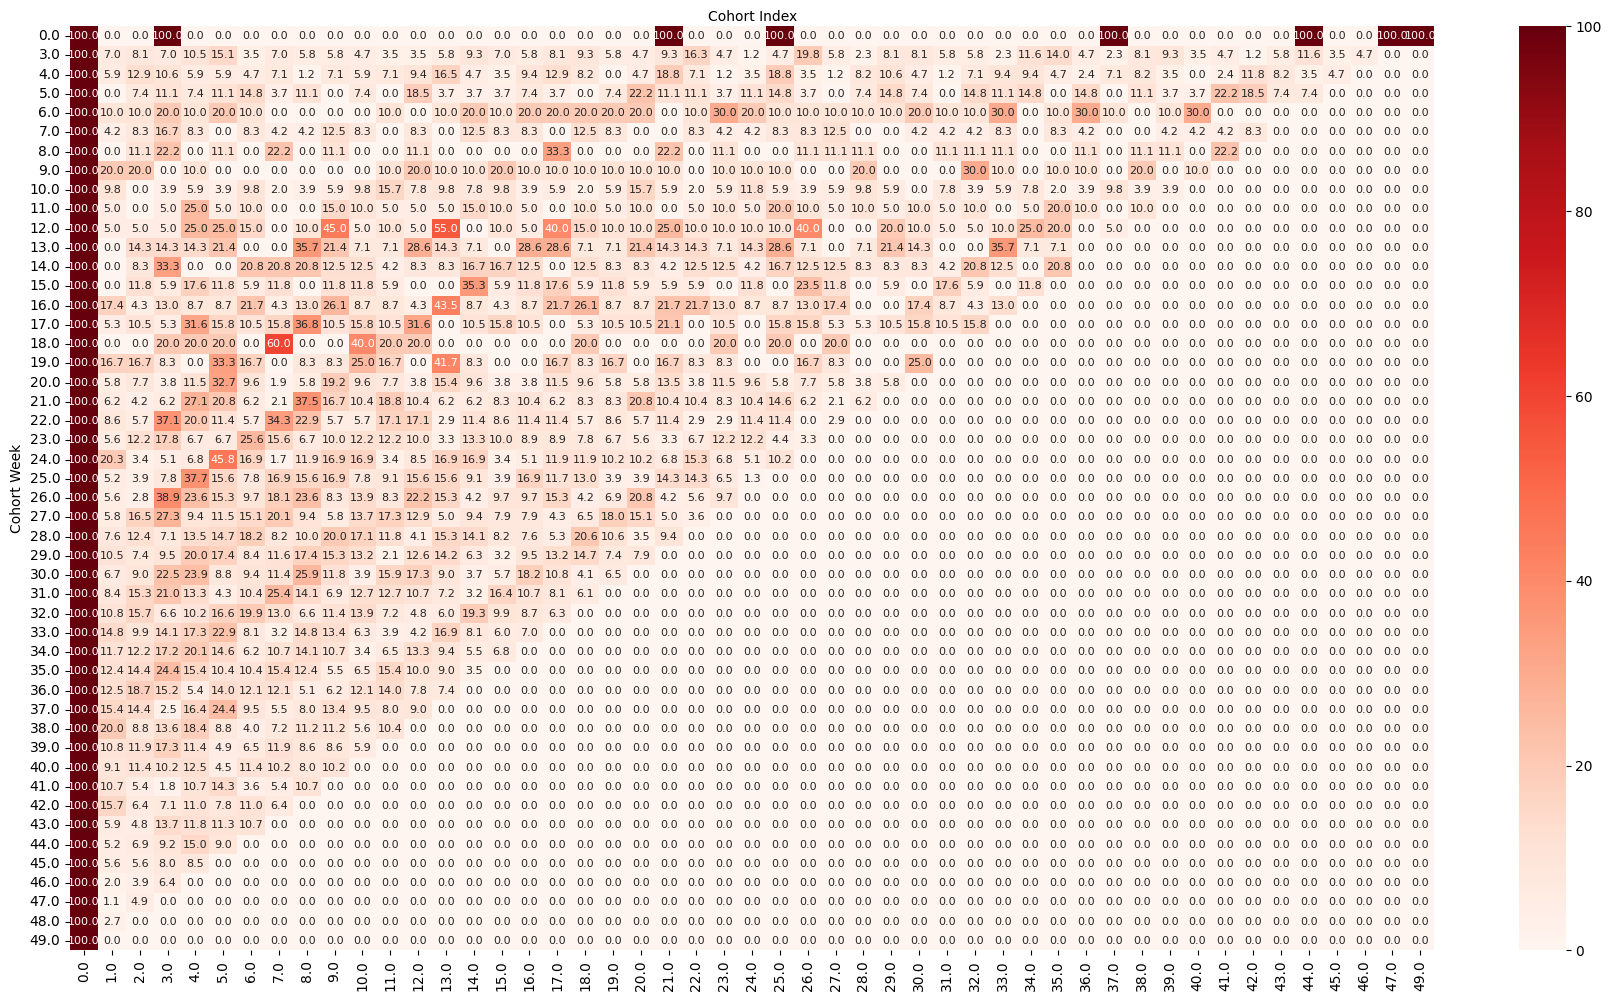

In [44]:

cash9_2 = cash8_2.divide(cash8_2.iloc[:,0], axis=0).round(3)*100
cash9_2
fig, ax = plt.subplots(1, 1, figsize=(22, 12))  # Aumentar el tamaño de la figura
sns.heatmap(cash9_2.fillna(0),  # Reemplazar NaN por 0
            annot=True,
            cmap="Reds",
            fmt='.1f',  # Formato con una cifra decimal
            annot_kws={"size": 8})  # Ajustar el tamaño del texto de las anotaciones
ax.set_ylabel('Cohort Week')
ax.set_xlabel('Cohort Index')
ax.xaxis.set_label_position('top')
plt.show()